Linear Regression


In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 
# 

In [141]:
data = pd.read_csv("cleaned_data.csv")
data.head()

,TV,Radio,Social Media,Influencer_Macro,Influencer_Mega,Influencer_Micro,Influencer_Nano,Sales
0,16.0,6.57,2.91,0,1,0,0,54.73
1,13.0,9.24,2.41,0,1,0,0,46.68
2,41.0,15.89,2.91,0,1,0,0,150.18
3,83.0,30.02,6.92,0,1,0,0,298.25
4,15.0,8.44,1.41,0,0,1,0,56.59


In [142]:
data =pd.DataFrame(data)

Scatterplot based on TV and Sale


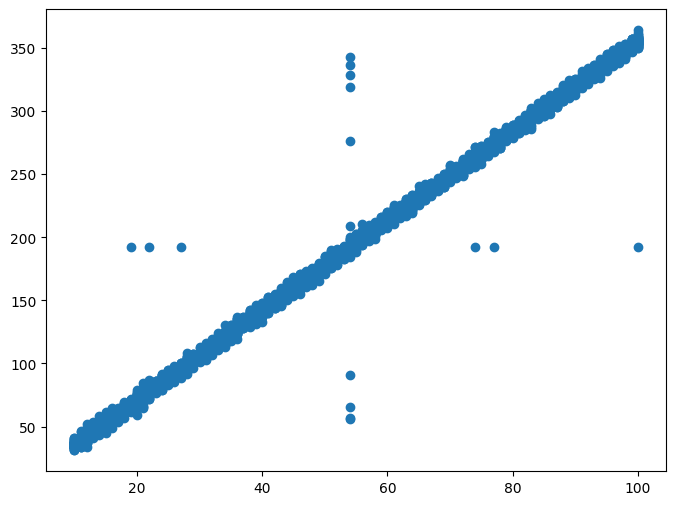

In [143]:
plt.figure(figsize=(8, 6))
plt.scatter(data["TV"], data["Sales"])

plt.xlabel = ("TV")
plt.ylabel = ("Sale")
plt.title = ("Tv and sale relation")
# plt.legend()
plt.show()

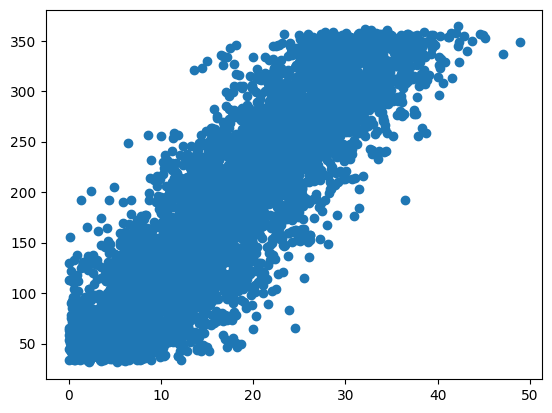

In [144]:
plt.scatter(data["Radio"], data["Sales"])

plt.xlabel = ("Radio")
plt.ylabel = ("Sale")
plt.title = ("Radio and sale relation")

plt.show()

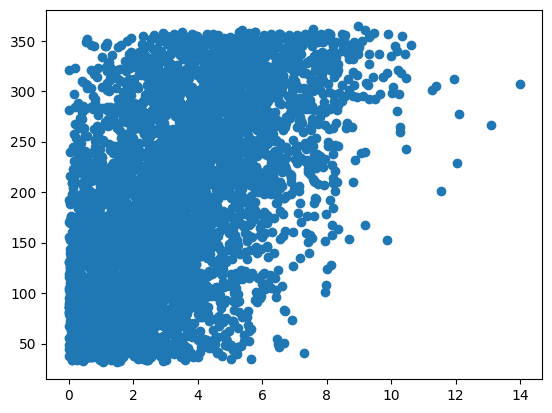

In [145]:
plt.scatter(data["Social Media"], data["Sales"])

plt.xlabel = ("Social Media")
plt.ylabel = ("Sale")
plt.title = ("Social Media and sale relation")

plt.show()

In [146]:
corr = data.corr(method='spearman')['Sales'].drop('Sales') 
print("Correlation between:\n", corr)

Correlation between:
 TV                  0.996675
Radio               0.872191
Social Media        0.528718
Influencer_Macro    0.019605
Influencer_Mega    -0.011348
Influencer_Micro   -0.004481
Influencer_Nano    -0.003595
Name: Sales, dtype: float64


In [147]:
x = data[["TV","Radio","Social Media","Influencer_Macro","Influencer_Mega","Influencer_Micro","Influencer_Nano"]]

y = data["Sales"]


In [148]:
x_train, x_test, y_train, y_test = train_test_split(x,y)


In [149]:
print(len(x_train), len(x_test))

3429 1143


Linear Regression

In [150]:
# for social media 
linear = LinearRegression()
linear.fit(x_train,y_train)

y_predict = linear.predict(x_test)
residuals = y_test -  y_predict



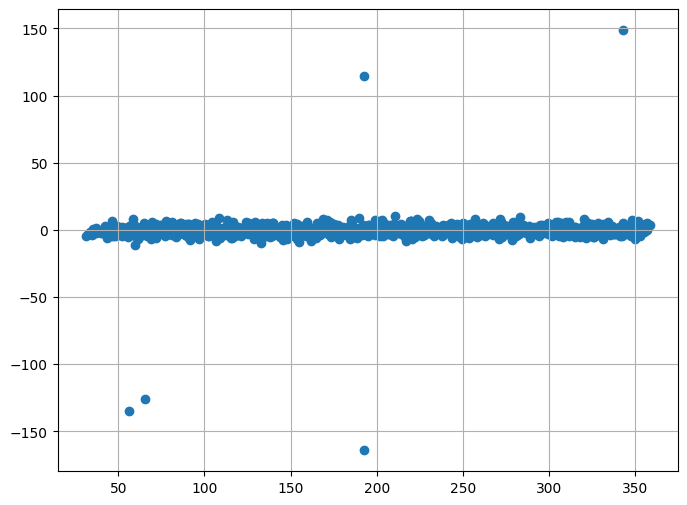

In [151]:
# residual plot 
plt.figure(figsize=(8,6))
plt.scatter(y_test, residuals)
plt.grid(True)

In [152]:
std = np.std(residuals)
r2 = r2_score(y_test, y_predict)

print("r2: ", r2)
print("Se: ", std)

r2:  0.9893259196130854
Se:  9.676385282596867


In [153]:
coefficients = linear.coef_
intercept = linear.intercept_

coefficients


array([ 3.51980565,  0.1074045 ,  0.07759971, -0.2711489 ,  0.26261714,
        0.05486673, -0.04633497])

In [154]:
print(f"Sales = {coefficients[0]:.3f}TV + {coefficients[1]:.3f}Radio + {coefficients[2]:.3f}Social Media + {coefficients[3]:.3f}Macro + {coefficients[4]:.3f}Mega + {coefficients[5]:.3f}Micro + {coefficients[6]:.3f}Nano + {intercept:.3f}")

Sales = 3.520TV + 0.107Radio + 0.078Social Media + -0.271Macro + 0.263Mega + 0.055Micro + -0.046Nano + 0.018
